#### KAGGLE Competition

# Titanic: Machine Learning from Disaster

[Competition Link : https://www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic)

## Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Goal

It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

## Metric

Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

## Submission File Format

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

1. PassengerId (sorted in any order)
2. Survived (contains your binary predictions: 1 for survived, 0 for deceased)
 
PassengerId|Survived
---|---
892|0
893|1
894|0
Etc|...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Reading input
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df_train['df_type'] = 'Train'
df_test['df_type'] = 'Test'

#Combining train and test data to perform data structure manipulation
df_combined = pd.concat([df_train,df_test])

df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
df_type        1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


### Data Understanding and Preparation

In [4]:
df_combined.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,df_type
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929,2
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,NaN,male,NaN,NaN,CA. 2343,Train
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11,891
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN,NaN


In [5]:
list(df_combined.Embarked.unique())

['S', 'C', 'Q', nan]

In [6]:
# Add the dummy columns for Embarked to the dataframe
df_combined = pd.concat([df_combined,pd.get_dummies(df_combined.Embarked)],axis=1) 

In [7]:
# Drop the variable Embarked as dummies created
df_combined = df_combined.drop('Embarked',axis=1)

In [8]:
# Creating variable with total number of family members onboard
df_combined['Fam_Mem_Onboard'] = df_combined.Parch + df_combined.SibSp + 1

In [9]:
# Changing gender to numeric : Male = 1, Female = 0
df_combined['Sex'] = df_combined.Sex.map({'male':1,'female':0})

In [10]:
list(df_combined.Pclass.unique())

[3, 1, 2]

In [11]:
# Calculate total passengers with same ticket
df_combined['Total_Passengers'] = df_combined.apply(lambda x: (df_combined['Ticket'] == x['Ticket']).sum() , axis=1)

In [12]:
# Drop Ticket column
df_combined = df_combined.drop('Ticket',axis=1)

In [13]:
# Checking if passenger was travelling alone (by number of family members and number of people with same ticket)
df_combined['IsAlone'] = df_combined.apply(lambda x: 1 if ((x['Total_Passengers'] == 1) and (x['Fam_Mem_Onboard'] == 1)) else 0,axis=1)

In [14]:
# extracting titles from names
df_combined['Title'] = df_combined.Name.str.extract('([A-Za-z]+\.)', expand=False)

In [15]:
# Checking for unique Titles
pd.DataFrame(df_combined.Title.unique())

,0
0,Mr.
1,Mrs.
2,Miss.
3,Master.
4,Don.
5,Rev.
6,Dr.
7,Mme.
8,Ms.
9,Major.


In [16]:
# Let's see if we can replace titles with more common terms or mark them as rare
pd.crosstab(df_combined.Title,df_combined.Sex)


Sex,0,1
Title,,
Capt.,0,1
Col.,0,4
Countess.,1,0
Don.,0,1
Dona.,1,0
Dr.,1,7
Jonkheer.,0,1
Lady.,1,0
Major.,0,2


In [17]:
# Replacing Title with common terms

df_combined['Title'] = df_combined['Title'].replace(['Lady.', 'Countess.','Capt.', 'Col.','Don.', 'Dr.', 'Major.', 'Rev.', 'Sir.', 'Jonkheer.', 'Dona.'],'Rare')

df_combined['Title'] = df_combined['Title'].replace('Mlle.', 'Miss.')
df_combined['Title'] = df_combined['Title'].replace('Ms.', 'Miss.')
df_combined['Title'] = df_combined['Title'].replace('Mme.', 'Mrs.')

pd.crosstab(df_combined.Title,df_combined.Sex)

Sex,0,1
Title,,
Master.,0,61
Miss.,264,0
Mr.,0,757
Mrs.,198,0
Rare,4,25


In [18]:
# Dummy variables for titles
df_combined = pd.concat([df_combined,pd.get_dummies(df_combined['Title'])],axis=1)

In [19]:
# Dropping Title Column
df_combined = df_combined.drop('Title',axis=1)

In [20]:
# dropping Name column
df_combined = df_combined.drop('Name',axis=1)

In [21]:
df_combined.head(20)

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,df_type,...,Q,S,Fam_Mem_Onboard,Total_Passengers,IsAlone,Master.,Miss.,Mr.,Mrs.,Rare
0,22.0,NaN,7.2500,0,1,3,1,1,0.0,Train,...,0,1,2,1,0,0,0,1,0,0
1,38.0,C85,71.2833,0,2,1,0,1,1.0,Train,...,0,0,2,2,0,0,0,0,1,0
2,26.0,NaN,7.9250,0,3,3,0,0,1.0,Train,...,0,1,1,1,1,0,1,0,0,0
3,35.0,C123,53.1000,0,4,1,0,1,1.0,Train,...,0,1,2,2,0,0,0,0,1,0
4,35.0,NaN,8.0500,0,5,3,1,0,0.0,Train,...,0,1,1,1,1,0,0,1,0,0
5,NaN,NaN,8.4583,0,6,3,1,0,0.0,Train,...,1,0,1,1,1,0,0,1,0,0
6,54.0,E46,51.8625,0,7,1,1,0,0.0,Train,...,0,1,1,2,0,0,0,1,0,0
7,2.0,NaN,21.0750,1,8,3,1,3,0.0,Train,...,0,1,5,5,0,1,0,0,0,0
8,27.0,NaN,11.1333,2,9,3,0,0,1.0,Train,...,0,1,3,3,0,0,0,0,1,0
9,14.0,NaN,30.0708,0,10,2,0,1,1.0,Train,...,0,0,2,2,0,0,0,0,1,0


In [22]:
# Separating training and testing data

train = df_combined[df_combined.df_type == 'Train']
train = train.drop('df_type',axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 20 columns):
Age                 714 non-null float64
Cabin               204 non-null object
Fare                891 non-null float64
Parch               891 non-null int64
PassengerId         891 non-null int64
Pclass              891 non-null int64
Sex                 891 non-null int64
SibSp               891 non-null int64
Survived            891 non-null float64
C                   891 non-null uint8
Q                   891 non-null uint8
S                   891 non-null uint8
Fam_Mem_Onboard     891 non-null int64
Total_Passengers    891 non-null int64
IsAlone             891 non-null int64
Master.             891 non-null uint8
Miss.               891 non-null uint8
Mr.                 891 non-null uint8
Mrs.                891 non-null uint8
Rare                891 non-null uint8
dtypes: float64(3), int64(8), object(1), uint8(8)
memory usage: 97.5+ KB


In [23]:
test = df_combined[df_combined.df_type == 'Test']
test = test.drop('df_type',axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 20 columns):
Age                 332 non-null float64
Cabin               91 non-null object
Fare                417 non-null float64
Parch               418 non-null int64
PassengerId         418 non-null int64
Pclass              418 non-null int64
Sex                 418 non-null int64
SibSp               418 non-null int64
Survived            0 non-null float64
C                   418 non-null uint8
Q                   418 non-null uint8
S                   418 non-null uint8
Fam_Mem_Onboard     418 non-null int64
Total_Passengers    418 non-null int64
IsAlone             418 non-null int64
Master.             418 non-null uint8
Miss.               418 non-null uint8
Mr.                 418 non-null uint8
Mrs.                418 non-null uint8
Rare                418 non-null uint8
dtypes: float64(3), int64(8), object(1), uint8(8)
memory usage: 45.7+ KB


In [24]:
train.describe(include='all')

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,C,Q,S,Fam_Mem_Onboard,Total_Passengers,IsAlone,Master.,Miss.,Mr.,Mrs.,Rare
count,714.000000,204,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,C23 C25 C27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,29.699118,NaN,32.204208,0.381594,446.000000,2.308642,0.647587,0.523008,0.383838,0.188552,0.086420,0.722783,1.904602,2.121212,0.502806,0.044893,0.207632,0.580247,0.141414,0.025814
std,14.526497,NaN,49.693429,0.806057,257.353842,0.836071,0.477990,1.102743,0.486592,0.391372,0.281141,0.447876,1.613459,1.796660,0.500273,0.207186,0.405840,0.493796,0.348644,0.158668
min,0.420000,NaN,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,NaN,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,NaN,14.454200,0.000000,446.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,38.000000,NaN,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [25]:
# Dropping Cabin column as it serves no purpose in the analysis
train = train.drop('Cabin',axis=1)
test = test.drop('Cabin',axis=1)

In [26]:
# Above we can see that Age has lesser entries denoting NA values
# Filling NA with median for Age
ageMedian = train['Age'].median()
train.fillna(value={'Age':ageMedian}, inplace=True)

ageMedian = test['Age'].median()
test.fillna(value={'Age':ageMedian}, inplace=True)

In [27]:
FareMedian = test['Fare'].median()
test.fillna(value={'Fare':FareMedian}, inplace=True)

### Exploratory Data Analysis

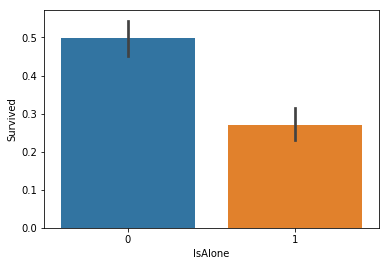

In [28]:
sns.barplot(x='IsAlone',y='Survived',data=train)

# Those who were alone had a lower chance of survival

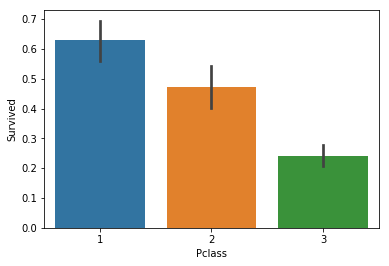

In [29]:
sns.barplot(x='Pclass',y='Survived',data=train)

#This shows an important trend that people with higher class travel had better chance of survival 

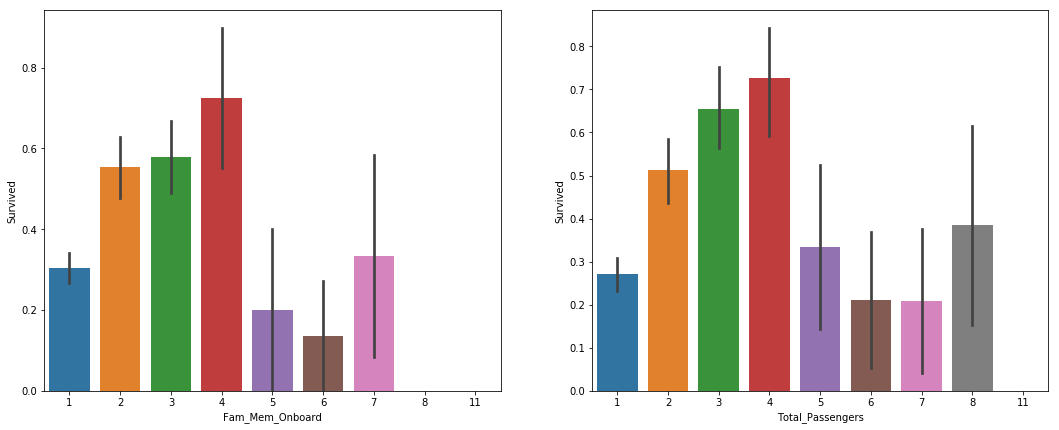

In [30]:
plt.figure(figsize=[18,7])

plt.subplot(1,2,1)
plt1 = sns.barplot(x='Fam_Mem_Onboard',y='Survived',data=train)

plt.subplot(1,2,2)
plt2 = sns.barplot(x='Total_Passengers',y='Survived',data=train)

plt.show()

# Those who were travelling with less than 4 people onboard had a better chance of survival

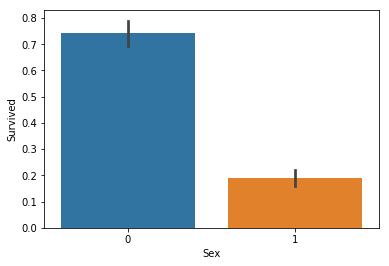

In [31]:
sns.barplot(x='Sex',y='Survived',data=train)

# Females had a better chance of survival

In [32]:
# Percentage of people survived based on Embarkment

for emb in ['C','Q','S']:
    print((emb,round((train[train['Survived'] == 1][emb].sum())/(len(train[train['Survived'] == 1]))*100,2)))

('C', 27.19)
('Q', 8.77)
('S', 63.45)


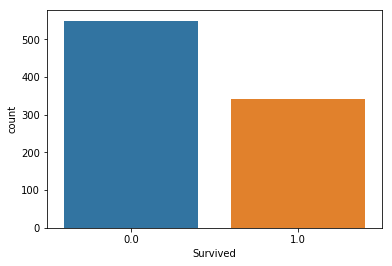

In [33]:
sns.countplot(x='Survived',data=train)

# The data is not very unbalanced, hence not performing data balancing

### Modelling

In [34]:
X_train = train.drop(['PassengerId','Survived'],axis=1)
y_train = train[['PassengerId','Survived']]

X_test = test.drop(['PassengerId','Survived'],axis=1)

#### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

lr_1 = LogisticRegression()
model_lr_1 = lr_1.fit(X_train,y_train['Survived'])
prob_lr_1 = model_lr_1.predict_proba(X_train)[:,1]

In [36]:
from sklearn import metrics

pred_table_lr_1 = y_train
pred_table_lr_1.is_copy = False
pred_table_lr_1['Prob'] = prob_lr_1
pred_table_lr_1['Pred'] = pred_table_lr_1['Prob'].map(lambda x: 1 if x > 0.5 else 0)
metrics.accuracy_score(pred_table_lr_1.Survived, pred_table_lr_1.Pred)

# We get an accuracy of 82.9% 

0.8294051627384961

In [37]:
prob_lr_1_test = model_lr_1.predict_proba(X_test)[:,1]

pred_table_lr_1_test = pd.DataFrame(test['PassengerId'])
pred_table_lr_1_test.is_copy = False
pred_table_lr_1_test['Prob'] = prob_lr_1_test
pred_table_lr_1_test['Pred'] = pred_table_lr_1_test['Prob'].map(lambda x: 1 if x > 0.5 else 0)

In [38]:
pred_table_lr_1_test = pred_table_lr_1_test.drop('Prob',axis=1)

In [39]:
pred_table_lr_1_test = pred_table_lr_1_test.rename(columns={'Pred':'Survived'})

### My First Submission (Logistic Regression)
#### Not so perfect

In [40]:
pred_table_lr_1_test.to_csv('Logistic_1_solution.csv',index=False)

### Continuing with other models

#### Choosing a better cutoff for Logistic Regression

In [41]:
# Creating columns with different probability cutoffs 
y_pred_all_1 = pred_table_lr_1
y_pred_all_1.is_copy = False

numbers = [float(x)/10 for x in range(10)]
numbers

for i in numbers:
    y_pred_all_1[i]= pred_table_lr_1.Prob.map( lambda x: 1 if x > i else 0)
y_pred_all_1.head()

#Checking Accuracy, Sensitivity and Specificity at different probability value

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
for i in numbers:
    cm1 = metrics.confusion_matrix(pred_table_lr_1.Survived, pred_table_lr_1[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.383838     0.000000     1.000000
0.1          0.1  0.611672     0.408015     0.938596
0.2          0.2  0.741863     0.663024     0.868421
0.3          0.3  0.790123     0.766849     0.827485
0.4          0.4  0.822671     0.852459     0.774854
0.5          0.5  0.829405     0.883424     0.742690
0.6          0.6  0.827160     0.914390     0.687135
0.7          0.7  0.803591     0.965392     0.543860
0.8          0.8  0.769921     0.989071     0.418129
0.9          0.9  0.700337     0.994536     0.228070


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


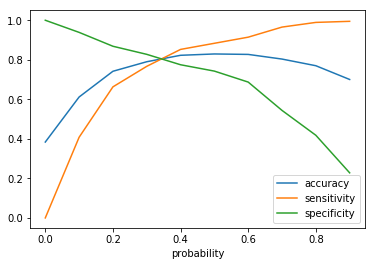

In [42]:
#Plotting the chart
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])

In [43]:
# Lets choose 0.35 as the cutoff value to get a better score and check

pred_table_lr_2_test = pd.DataFrame(test['PassengerId'])
pred_table_lr_2_test.is_copy = False
pred_table_lr_2_test['Prob'] = prob_lr_1_test
pred_table_lr_2_test['Pred'] = pred_table_lr_2_test['Prob'].map(lambda x: 1 if x > 0.35 else 0)

In [44]:
# My 2nd Submission

pred_table_lr_2_test = pred_table_lr_2_test.drop('Prob',axis=1)
pred_table_lr_2_test = pred_table_lr_2_test.rename(columns={'Pred':'Survived'})
pred_table_lr_2_test.to_csv('Logistic_2_solution.csv',index=False)

### Cross Validation : k fold

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10,shuffle=True, random_state=111)

### KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=15)
score = cross_val_score(clf,X_train,y_train['Survived'],cv=k_fold, scoring='accuracy')
print(round(np.mean(score)*100,2))

72.29


### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
score = cross_val_score(clf,X_train,y_train['Survived'],cv=k_fold, scoring='accuracy')
print(round(np.mean(score)*100,2))

77.67


### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=15)
score = cross_val_score(clf,X_train,y_train['Survived'],cv=k_fold, scoring='accuracy')
print(round(np.mean(score)*100,2))

80.92


### SVM

In [49]:
from sklearn.svm import SVC

clf = SVC()
score = cross_val_score(clf,X_train,y_train['Survived'],cv=k_fold, scoring='accuracy')
print(round(np.mean(score)*100,2))

74.3


### Going to use RANDOM FOREST for final model

In [50]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': range(2, 20, 4),
             'min_samples_leaf': range(20, 200, 30),
             'min_samples_split': range(20, 200, 30),
             'n_estimators': range(20,200,30),
             'max_features': range(5,16,4)}

clf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=clf, param_grid=parameters, cv=k_fold, n_jobs= -1)

In [51]:
# Fit the grid search to the data
#grid_search.fit(X_train, y_train['Survived'])

In [52]:
#grid_search.best_estimator_

In [53]:
final_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=80,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
final_model = final_clf.fit(X_train, y_train['Survived'])

In [55]:
final_prediction = final_model.predict(X_test)

In [56]:
final_submission = pd.DataFrame(test.PassengerId)
final_submission['Survived'] = np.array(final_prediction,dtype=int)
final_submission.to_csv('Random_Forest_1.csv',index=False)

### Trying Yet Another Random Forest with more n_estimators


In [57]:
final_clf_2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=80,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
final_model_2 = final_clf_2.fit(X_train, y_train['Survived'])
final_prediction_2 = final_model_2.predict(X_test)
final_submission_2 = pd.DataFrame(test.PassengerId)
final_submission_2['Survived'] = np.array(final_prediction_2,dtype=int)
final_submission_2.to_csv('Random_Forest_2.csv',index=False)